In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Overview

We're going to prove the following well-known equivalence: for an odd prime $p$,
the following are equivalent:
1) $p \equiv 1 \pmod 4$.
2) There is an integer $a$ such that $a^2 \equiv -1 \pmod p$.
3) There exist $a,b$ such that $a^2 + b^2 = p$.

The first condition is straightforward: $p$ leaves a remainder of 1 when divided by 4, or equivalently, $p = 4k+1$ for some integer $k$.

The second condition is saying we have a square root of $-1$ when we work mod $p$.

The third condition is saying there is a right triangle where the hypotenuse has length $\sqrt{p}$ and the other sides have integer length.

This result is not particularly crucial for what we are doing, but this setting will allow us introduce some of the language/techniques/ideas we will be using later on.

## Square root of -1

Let $p$ be a prime of the form $4k+1$.
We want to show that there is an integer $a$ such that $a^2 +1$ is divisible by $p$.

* Whether or not $a$ is a "square root of -1 mod $p$" only depends on the class of $a$ mod $p$: if $a = b \pmod p$ and $a^2 = -1 \pmod p$, then $b^2 = -1 \pmod p$. 
* Up to equality mod $p$, there are precisely $p$ distinct classes of integers mod $p$ that we have to worry about - we can call them $0, 1, .., p-1$.
* We know that $0, 1$ are not square roots of $-1$, so we can get rid of them. We also know that $(-1)^2 = 1$ so $-1$ is not a square root of $-1$, so we can also ignore it. That leaves us with $p-3$ integers to consider, namely $2, 3 , ..., p-2$.

Let $a$ be one of the remaining elements. Since we are working mod a prime, and $a$ is not 0, we can divide by $a$ mod $p$: in other words, there is a unique class mod $p$ that we denote $\frac{1}{a}$ with the property that $a \cdot \frac{1}{a} = 1 \pmod p$. For example, $\frac{1}{2} = 3 \pmod 5$ because $2 \cdot 3 = 6 \equiv 1 \pmod 5$. This is all well-known and built into Python:

In [1]:
pow(2,-1,5)

3

If $a^2 = -1$, then $\left( \frac{1}{a}\right)^2 = \frac{1}{-1} = -1$ so,
so $\frac{1}{a}$ will also be a square root of -1. 

Now, if $a = \frac{1}{a}$ then $a^2 = 1$ so $a = \pm 1$. We have thrown away $\pm 1$ so that means $a \neq \frac{1}{a}$ for any of the remaining $p-3$ elements. Thus, we have $\frac{p-3}{2}$ (unordered) pairs of elements to consider.



In [3]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


In [4]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [29]:
cmap = mpl.colormaps['hsv']
def preinv_colors(xs,p):
    colors = []
    for x in xs:
        if x*(x*x-1) % p == 0:
            colors.append([0.5,0.5,0.5,0.5])
        else:
            colors.append(cmap((x%p)/p))
    return colors

def inv_colors(xs,p):
    colors = []
    for x in xs:
        if x*(x*x-1) % p == 0:
            colors.append([0.5,0.5,0.5,0.5])
        else:
            colors.append(cmap(pow(x,-1,p)/p))
    return colors

In [30]:
inv_colors(xvals,5)

[[0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 (0.0, 0.4562523625023627, 1.0, 1.0),
 (0.0, 1.0, 0.3625004724974957, 1.0),
 [0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 (0.0, 0.4562523625023627, 1.0, 1.0),
 (0.0, 1.0, 0.3625004724974957, 1.0),
 [0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 (0.0, 0.4562523625023627, 1.0, 1.0),
 (0.0, 1.0, 0.3625004724974957, 1.0),
 [0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 [0.5, 0.5, 0.5, 0.5],
 (0.0, 0.4562523625023627, 1.0, 1.0),
 (0.0, 1.0, 0.3625004724974957, 1.0),
 [0.5, 0.5, 0.5, 0.5]]

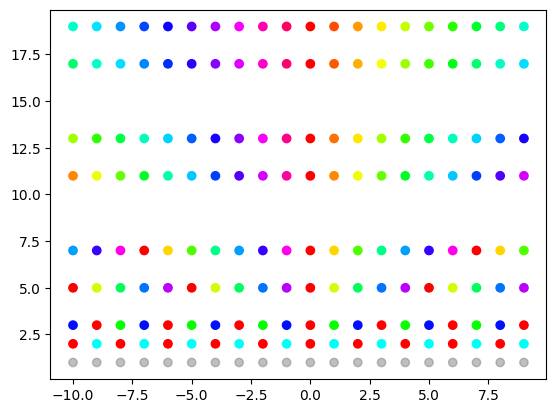

In [27]:
xvals = [a for a in range(-10,10)]
yvals = np.array([1 for a in xvals])
for p in [2,3,5,7,11,13,17,19]:
    plt.scatter(x=xvals,y=p*yvals,c=[cmap((a%p)/p) for a in xvals])

plt.scatter(x=xvals,y=yvals,c = [[0.5,0.5,0.5,0.5] for x in xvals])
plt.show()

In [20]:
xvals = [a for a in range(-10,10)]
yvals = np.array([1 for a in xvals])
for p in [2,3,5,7,11,13,17,19]:
    plt.scatter(x=xvals,y=p*yvals,c=[cmap((a%p)/p) for a in xvals])

plt.scatter(x=xvals,y=yvals,c = [[0.5,0.5,0.5,0.5] for x in xvals])
plt.show()

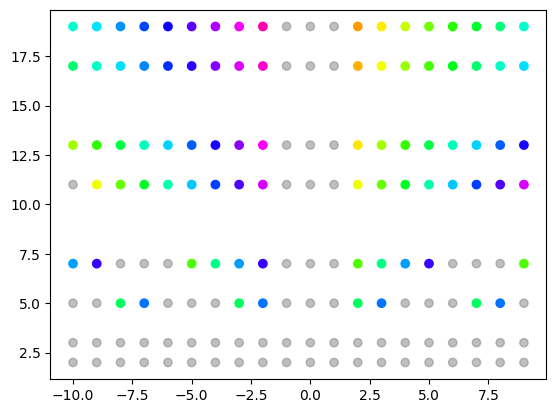

In [28]:
xvals = [a for a in range(-10,10)]
yvals = np.array([1 for a in xvals])
for p in [2,3,5,7,11,13,17,19]:
    plt.scatter(x=xvals,y=p*yvals,c=inv_colors(xvals,p))

plt.show()

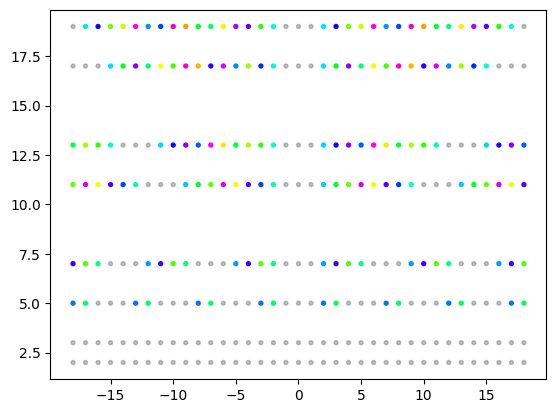

In [44]:
xvals = [a for a in range(-18,18+1)]
yvals = np.array([1 for a in xvals])
for p in [2,3,5,7,11,13,17,19]:
    plt.scatter(x=xvals,y=p*yvals,c=inv_colors(xvals,p),s=8)

plt.show()

Elements are represented by colors; two elements belong to the same pair if the associated colors switched positions in the two pictures.

Now, each of these pairs is determined by the sum of the elements: if we know $a+\frac{1}{a}$, then $a, \frac{1}{a}$ can be obtained as the roots of the quadratic $x^2-(a+\frac{1}{a})x+1 = 0$.

We will use this to re-color the previous picture, this time colors any two points in the same pair with the same color.

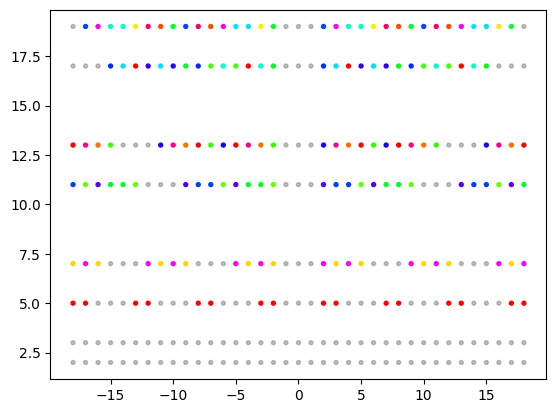

In [42]:
xvals = [a for a in range(-18,18+1)]
yvals = np.array([1 for a in xvals])
for p in [2,3,5,7,11,13,17,19]:
    colors = []
    for x in xvals:
        if x*(x*x-1)%p == 0:
            colors.append([0.5,0.5,0.5,0.5])
        else:
            xplusxinv = x+pow(x,-1,p)
            colors.append(cmap((xplusxinv%p)/p))
    plt.scatter(x=xvals,y=p*yvals,c=colors,s=8)
plt.show()

The unordered pairs we now have admit a symmetry of their own: we can send each pair $a, \frac{1}{a}$ to the pair $-a,\frac{-1}{a}$.
Note that this does not depend on the order of $a, \frac{1}{a}$ because $\frac{1}{-a} = -\frac{1}{a}$ and $\frac{1}{\frac{1}{a}} = a$.

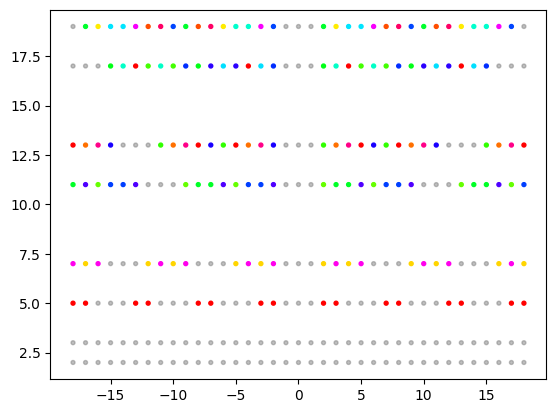

In [46]:
xvals = [a for a in range(-18,18+1)]
yvals = np.array([1 for a in xvals])
for p in [2,3,5,7,11,13,17,19]:
    colors = []
    for x in xvals:
        if x*(x*x-1)%p == 0:
            colors.append([0.5,0.5,0.5,0.5])
        else:
            nxplusxinv = -x+pow(-x,-1,p)
            colors.append(cmap((nxplusxinv%p)/p))
    plt.scatter(x=xvals,y=p*yvals,c=colors,s=8)
plt.show()

### Punchline

When we apply the negation map to the pairs $a, \frac{1}{a}$, the pairs themselves are paired up into pairs of pairs - UNLESS the pair $a, \frac{1}{a}$ is equal to the pair $-a, \frac{-1}{a}$ in some order.

* It is not possible that $a = -a$, since we've thrown away 0.
* Thus, if $a, \frac{1}{a}$ is not paired up with a new pair, then it must be the case that $-a = \frac{1}{a}$.

If $-a = \frac{1}{a}$, then $a^2 = -1$. This means we have our desired square root of -1 mod $p$.

The point of the previous pictures is that we can find that square root in the picture, if one exists at all: we just need to look for a pair of points that don't change color.

* When $p = 5$, there is clearly a square root of -1, because there is only one color.

* When $p = 7$, the yellow and pink points get swapped, so we don't have a square root of -1.



Now, $5 = 1 \pmod 4$ and we've found a square root of -1 mod 5, whereas $7 = 3 \pmod 4$ and we didn't find a square root of -1 mod 7. How do we show this always holds?

Easy: if $p = 1 \pmod 4$, then we have $\frac{p-3}{2}$ pairs $a, \frac{1}{a}$.
Well, this number is necessarily odd - so it's impossible to pair up all of those pairs. Therefore at least one pair has to stay where it is, so we have a square root of -1.

## Minkowski

